<a href="https://colab.research.google.com/github/gustavo-fermiano/PorTran/blob/main/Projeto_Aplicado_I_Etapa_2_e_Etapa_3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Aplicado I - Etapa 2 e Etapa 3

**Nome: Gustavo José Fermiano - RA: 10440929 - Curso: Ciência de Dados - 2º semestre**

# 1 - Carregamento do dataframe

Na primeira etapa faremos a instalação e importação das bibliotecas necessárias e o carregamento do arquivo *.csv para a plataforma Google Colab


In [82]:
# Instalação da biblioteca pandas
!pip install pandas

In [83]:
import pandas as pd # Importação da biblioteca Pandas

In [84]:
import matplotlib.pyplot as plt # Importação da biblioteca Matplotlib para plotar gráficos

In [85]:
# Importação do arquivo *.CSV a partir da plataforma Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
# Carregamento o arquivo CSV para o dataframe df
df = pd.read_csv ("/content/drive/MyDrive/2023_Viagem.csv", encoding='latin1', sep=';')

In [87]:
# Exibição das primeiras linhas do dataset
print(df.head())

   Identificador do processo de viagem Número da Proposta (PCDP)   Situação  \
0                             17821923              000001/23-1C  Realizada   
1                             18236583                 000018/23  Realizada   
2                             18288418              000007/23-1C  Realizada   
3                             18296348                 000070/23  Realizada   
4                             18302983                 000001/23  Realizada   

  Viagem Urgente                      Justificativa Urgência Viagem  \
0            NÃO                                     Sem informação   
1            NÃO                                     Sem informação   
2            SIM                        Por necessidade do serviço.   
3            SIM  A efetivação do empenho no Siafi e a respectiv...   
4            NÃO                                     Sem informação   

   Código do órgão superior  Nome do órgão superior  Código órgão solicitante  \
0                

In [88]:
# Exibição do número de linhas e atributos do dataframe

nrow, ncol = df.shape
print(nrow) # Número de linhas
print(ncol) # Número de colunas

827433
22


# 2 - Análise do atributo "Situação"

In [89]:
# Verificação da contagem dos valores assumidos pelo atributo "Situação"

contagemSituacao = df["Situação"].value_counts()
print(contagemSituacao)

Situação
Realizada        810735
Não realizada     16698
Name: count, dtype: int64


In [90]:
percentualSituacao = df["Situação"].value_counts(normalize=True) * 100 # Cálculo do percentual dos campos
print(percentualSituacao)

Situação
Realizada        97.981951
Não realizada     2.018049
Name: proportion, dtype: float64


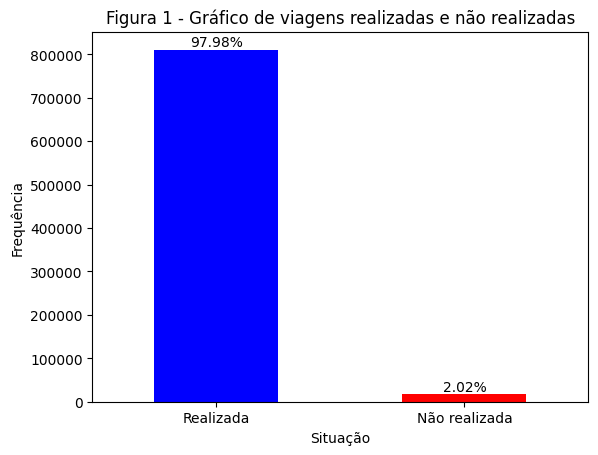

In [184]:
counts = df["Situação"].value_counts()
percentages = counts / counts.sum() * 100

# Criando gráfico em barras com valores totais e porcentagens
ax = counts.plot(kind='bar', color=['blue', 'red'])

# Adicionando percentuais
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(),
            f'{percentages.iloc[i]:.2f}%', ha='center', va='bottom')

# Título, rótulo do eixo y na vertical e rótulo do eixo x na horizontal
plt.ylabel('Frequência')
plt.title("Figura 1 - Gráfico de viagens realizadas e não realizadas")
plt.xticks(rotation=0)

plt.show()

# 3 - Análise do atributo "Urgência"

In [92]:
# Verificando contagem dos valores assumidos pelo atributo "Viagem Urgente"

contagemUrgencia = df["Viagem Urgente"].value_counts()
print(contagemUrgencia)

Viagem Urgente
SIM    513887
NÃO    313546
Name: count, dtype: int64


In [93]:
percentualUrgencia = df["Viagem Urgente"].value_counts(normalize=True) * 100 # Calculando o percentual dos campos
print(percentualUrgencia)

Viagem Urgente
SIM    62.106177
NÃO    37.893823
Name: proportion, dtype: float64


(array([0, 1]), [Text(0, 0, 'SIM'), Text(1, 0, 'NÃO')])

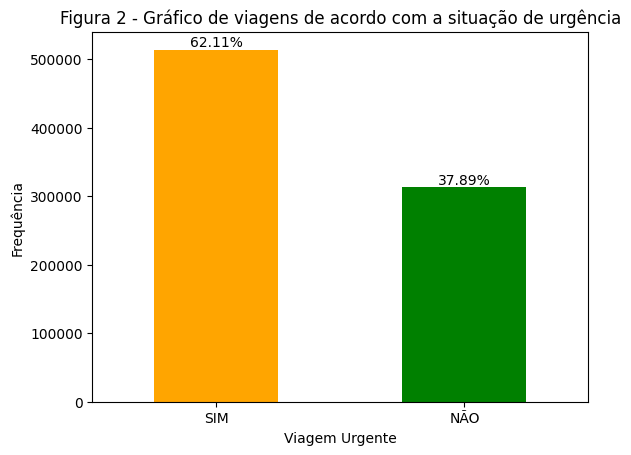

In [185]:
counts = df["Viagem Urgente"].value_counts()
percentages = counts / counts.sum() * 100

# Criando gráfico em barras com valores totais e porcentagens
ax = counts.plot(kind='bar', color=['orange', 'green'])

# Adicionando os percentuais
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
            f'{percentages.iloc[i]:.2f}%', ha='center', va='bottom')

# Ajustando o título, rótulo do eixo y na vertical e rótulo do eixo x na horizontal
plt.ylabel('Frequência')
plt.title("Figura 2 - Gráfico de viagens de acordo com a situação de urgência")
plt.xticks(rotation=0)

# 4 - Análise do atributo "Nome do órgão superior"

In [95]:
# Verificando os órgãos superiores com maior solicitação de diárias

print("Há valores NA? Resposta: ", df["Nome do órgão superior"].isna().any(), "\n") # verificando se há valores NA dentro do campo "Nome do órgão superior"

# Listando os órgãos superiores com maior número de solicitação de diárias

print("Listando os órgãos superiores com maior número de solicitação de diárias: \n")
orgaosFrequentes = df["Nome do órgão superior"].value_counts()
print(orgaosFrequentes)

Há valores NA? Resposta:  False 

Listando os órgãos superiores com maior número de solicitação de diárias: 

Nome do órgão superior
Ministério da Educação                                           172111
Sem informação                                                   163710
Ministério da Defesa                                             141907
Ministério da Justiça e Segurança Pública                        110707
Ministério do Meio Ambiente e Mudança do Clima                    42313
Ministério do Planejamento e Orçamento                            33787
Ministério da Agricultura e Pecuária                              28956
Ministério da Saúde                                               21684
Ministério da Previdência Social                                  19614
Ministério dos Transportes                                        18065
Ministério do Desenvolvimento Agrário e Agricultura Familiar      14417
Presidência da República                                          13889
Min

In [96]:
# Exibição dos percentuais

print("Listando os órgãos superiores com maior número de solicitação de diárias (valor percentual): \n")
orgaosFrequentes = df["Nome do órgão superior"].value_counts(normalize=True)*100
print(orgaosFrequentes)

Listando os órgãos superiores com maior número de solicitação de diárias (valor percentual): 

Nome do órgão superior
Ministério da Educação                                           20.800597
Sem informação                                                   19.785288
Ministério da Defesa                                             17.150271
Ministério da Justiça e Segurança Pública                        13.379573
Ministério do Meio Ambiente e Mudança do Clima                    5.113768
Ministério do Planejamento e Orçamento                            4.083352
Ministério da Agricultura e Pecuária                              3.499498
Ministério da Saúde                                               2.620635
Ministério da Previdência Social                                  2.370464
Ministério dos Transportes                                        2.183258
Ministério do Desenvolvimento Agrário e Agricultura Familiar      1.742377
Presidência da República                                 

# 5 - Análise do atributo "Nome órgão solicitante"

In [97]:
# Verificando os órgãos solicitantes (órgãos subordinados) com maior solicitação de diárias

print("Há valores NA? Resposta: ", df["Nome órgão solicitante"].isna().any(), "\n") # verificando se há valores NA dentro do campo "Nome do órgão superior"

# Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias

print("Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias: \n")
solicitantesFrequentes = df["Nome órgão solicitante"].value_counts()
pd.set_option('display.max_rows',200) # ampliando o número de linhas para 200, para não cortar as linhas do meio
display(solicitantesFrequentes)

Há valores NA? Resposta:  False 

Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias: 



,count
Nome órgão solicitante,
Sem informação,163710
Polícia Federal,69204
Comando da Aeronáutica,67829
Comando do Exército,52774
Polícia Rodoviária Federal,41215
Fundação Instituto Brasileiro de Geografia e Estatística,33375
Ministério da Agricultura e Pecuária - Unidades com vínculo direto,28956
Ministério da Defesa - Unidades com vínculo direto,21223
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,20966


In [98]:
# Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias (percentual)

print("Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias (percentual): \n")
solicitantesPercentual = df["Nome órgão solicitante"].value_counts(normalize=True)*100
display(solicitantesPercentual)

Listando os órgãos solicitantes (órgãos subordinados) com maior número de solicitação de diárias (percentual): 



,proportion
Nome órgão solicitante,
Sem informação,19.785288
Polícia Federal,8.363698
Comando da Aeronáutica,8.197522
Comando do Exército,6.378039
Polícia Rodoviária Federal,4.981068
Fundação Instituto Brasileiro de Geografia e Estatística,4.033559
Ministério da Agricultura e Pecuária - Unidades com vínculo direto,3.499498
Ministério da Defesa - Unidades com vínculo direto,2.564921
Instituto Brasileiro do Meio Ambiente e dos Recursos Naturais Renováveis,2.533861


In [99]:
# Verificando os cargos mais comuns quando o órgão está registrado como "Sem informação"

cargosSemInformacao = df[df["Nome órgão solicitante"] == "Sem informação"]["Cargo"].value_counts()
print(cargosSemInformacao.head(20))

Cargo
AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL    9965
ANALISTA TRIBUTARIO REC FEDERAL BRASIL      8505
AUDITOR FISCAL DO TRABALHO                  7760
Informações protegidas por sigilo           5599
AGENTE ADMINISTRATIVO                       2365
MOTORISTA OFICIAL                           2018
PROFESSOR DO MAGISTERIO SUPERIOR            1921
ASSISTENTE TECNICO ADMINISTRATIVO           1825
ESPECIALISTA EM RECURSOS MINERAIS           1762
ANALISTA DE INFRA-ESTRUTURA                 1083
TECNICO DO SEGURO SOCIAL                    1013
ANALISTA DO BANCO CENTRAL                    654
ESP. EM POL. PUBL. E GESTAO GOVERNAMENTA     646
PROCURADOR DA FAZENDA                        619
TECNOLOGISTA                                 519
ASSISTENTE EM CIENCIA E TECNOLOGIA           512
PESQUISADOR                                  464
ENGENHEIRO                                   454
ANALISTA TECNICO DE POLITICAS SOCIAIS        389
ANALISTA EM CIENCIA E TECNOLOGIA             386
Name: count, d

# 6 - Análise do atributo "Período – Data de início"

In [100]:
print(df["Período - Data de início"].isna().any()) # verificando se há valores NA

False


In [101]:
# Criação de uma nova coluna no dataframe no formato data: dataInicio

df["dataInicio"] = pd.to_datetime(df["Período - Data de início"], format="%d/%m/%Y")

# Criação de uma nova coluna no dataframe com o mês de início da viagem

df["mesInicio"] = df["dataInicio"].dt.month

# Criação de uma nova coluna n odataframe com o ano de início da viagem

df["anoInicio"] = df["dataInicio"].dt.year

In [102]:
# Verificando se há diárias iniciadas no ano anterior

contagemAnoInicio = df["anoInicio"].value_counts()
print(contagemAnoInicio)

anoInicio
2023    827433
Name: count, dtype: int64


In [103]:
# Contagem dos meses com maior frequência de diárias

contagemMeses = df["mesInicio"].value_counts().sort_index()
print(contagemMeses)

mesInicio
1      29938
2      38566
3      63013
4      56927
5      77809
6      67777
7      67772
8      83317
9      81806
10     94047
11    100408
12     66053
Name: count, dtype: int64


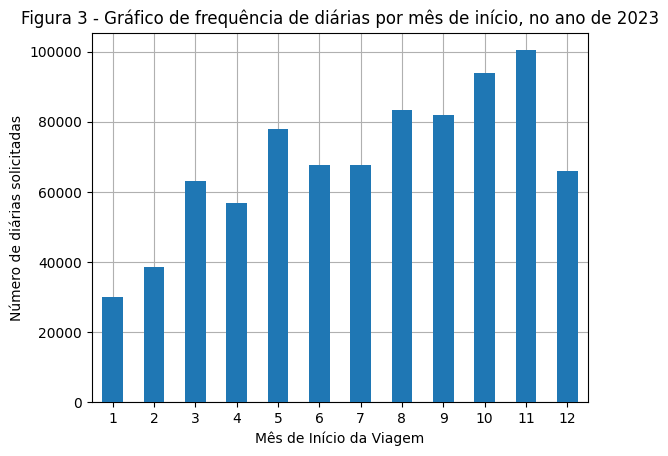

In [104]:
# Plot de gráfico em barras com número de diárias solicitados por mês (em 2023)

contagemMeses.plot(kind='bar', zorder=3)
plt.title("Figura 3 - Gráfico de frequência de diárias por mês de início, no ano de 2023")
plt.xlabel("Mês de Início da Viagem")
plt.ylabel ("Número de diárias solicitadas")
plt.grid(True, zorder=0) # Criando grid e posicionando atrás das barras
plt.xticks(rotation=0)
plt.show()

# 7 - Análise do atributo "Período - Data de fim"

In [105]:
print(df["Período - Data de fim"].isna().any()) # verificando se há valores NA

False


In [106]:
# Criação de uma nova coluna no dataframe no formato data: dataFim

df["dataFim"] = pd.to_datetime(df["Período - Data de fim"], format="%d/%m/%Y")

# Criação de uma nova coluna n odataframe com o ano de fim da viagem

df["anoFim"] = df["dataFim"].dt.year

In [107]:
# Verificando diárias encerradas no fim

contagemAnoFim = df["anoFim"].value_counts()
print(contagemAnoFim)

anoFim
2023    825976
2024      1457
Name: count, dtype: int64


Text(0.5, 1.0, 'Figura 4 - Ano de encerramento de viagens iniciadas em 2023')

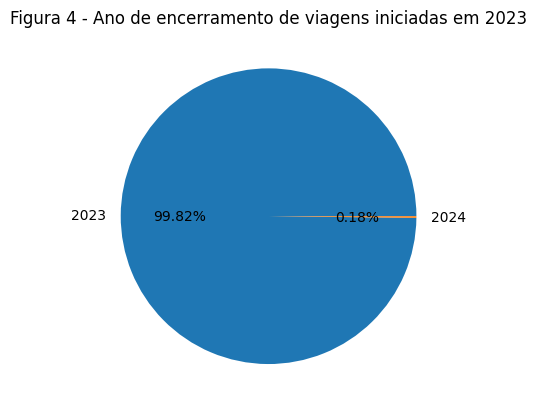

In [138]:
df["anoFim"].value_counts().plot(kind='pie', autopct='%1.2f%%') # Plotando gráfico da frequência da urgência de viagem e os valores com duas casas decimais
plt.ylabel('') # Removendo o eixo y
plt.title("Figura 4 - Ano de encerramento de viagens iniciadas em 2023")

# 8 - Inserção de nova variável: Total de dias da viagem

Uma das informações que o dataset não contempla, porém podemos obter através do processamento de outros atributos, é o total de dias de viagem. Essa informação pode ser obtida verificando o número de dias decorrido entre a data de início e a data de fim da viagem.

In [109]:
df["totalDiasViagem"] = (df["dataFim"] - df["dataInicio"]).dt.days # Cálculo do total de dias de viagem

In [110]:
print(f"Média de dias de viagem: {df['totalDiasViagem'].mean():.2f}") # Print da média de dias de viagem
print(f"Mediana de dias de viagem: {df['totalDiasViagem'].median():.2f}") # Print da mediana de dias de viagem
print(f"Desvio padrão: {df['totalDiasViagem'].std():.2f}") # Print do desvio padrão de dias de viagem

Média de dias de viagem: 5.90
Mediana de dias de viagem: 3.00
Desvio padrão: 18.07


In [111]:
# Dividindo o número de dias de viagem por faixa

bins = [-1, 5, 10, 50, 10000] # Faixas, utilizei o valor -1 pois a primeira faixa deve incluir também o valor ZERO
labels = ["Menos de 5 dias", "Entre 5 e 10 dias", "Entre 10 e 50 dias", "Mais de 50 dias"] # Labels

df["faixaDiasViagem"] = pd.cut(df["totalDiasViagem"], bins=bins, labels=labels) # Criação da nova coluna com a faixa de dias de viagem

print(df["faixaDiasViagem"].value_counts()) # Print da quantidade de viagens por faixa

faixaDiasViagem
Menos de 5 dias       630184
Entre 5 e 10 dias      95179
Entre 10 e 50 dias     94167
Mais de 50 dias         7903
Name: count, dtype: int64


In [112]:
# Calculando a amplitude do número de dias viajados

print(df["totalDiasViagem"].max())
print(df["totalDiasViagem"].min())

525
0


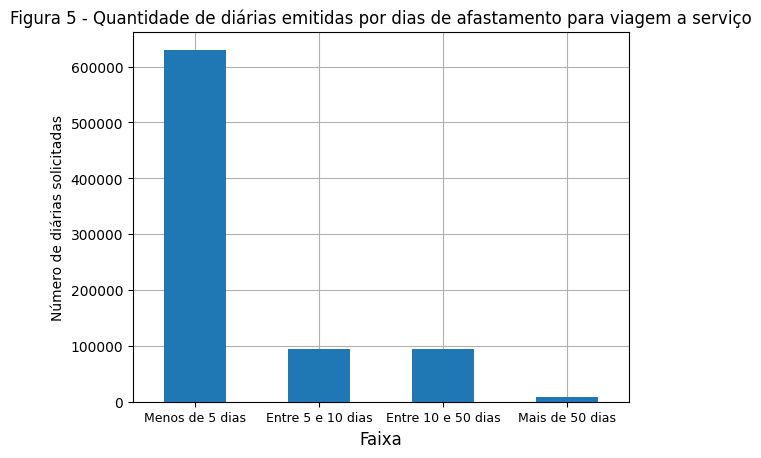

In [186]:
# Plot do gráfico de diárias por número de dias

df["faixaDiasViagem"].value_counts().plot(kind='bar', zorder=3)
plt.title("Figura 5 - Quantidade de diárias emitidas por dias de afastamento para viagem a serviço")
plt.xlabel("Faixa", size=12)
plt.ylabel ("Número de diárias solicitadas")
plt.grid(True, zorder=0)

# Adicionar rótulos nas barras com o número total de ocorrências
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
            f'{counts.iloc[i]}', ha='center', va='bottom', fontsize=10)

# Ajustar o tamanho do texto debaixo das barras (rótulos do eixo X)
plt.xticks(rotation=0, fontsize=9)  # Aqui você ajusta o tamanho da fonte

plt.show()

# 9 - Percentual de viagens sigilosas

Através da análise de diferentes atributos do dataset, podemos verificar o percentual de viagens marcadas como sigilosas dentro do dataset.

In [114]:
# Verificando os campos marcados com sigilo no atributo Destinos

contagemSigilo = df["Destinos"].value_counts().get("Informações protegidas por sigilo")
print("Número de linhas em Destinos marcadas com sigilo: ", contagemSigilo)

# Verificando os campos marcados com sigilo no atributo Função

contagemSigilo = df["Descrição Função"].value_counts().get("Informações protegidas por sigilo")
print("Número de linhas em Descrição Função marcadas com sigilo: ", contagemSigilo)

# Verificando os campos marcados com sigilo no atributo Cargo

contagemSigilo = df["Cargo"].value_counts().get("Informações protegidas por sigilo")
print("Número de linhas em Cargo marcadas com sigilo: ", contagemSigilo)

Número de linhas em Destinos marcadas com sigilo:  118246
Número de linhas em Descrição Função marcadas com sigilo:  118246
Número de linhas em Cargo marcadas com sigilo:  118246


In [115]:
# Criação de um novo atributo no dataset para definir se viagem é sigilosa: 'Sim' ou 'Não'

df["Sigilo"] = df["Destinos"].apply(lambda x: "Sim" if x == "Informações protegidas por sigilo" else "Não")

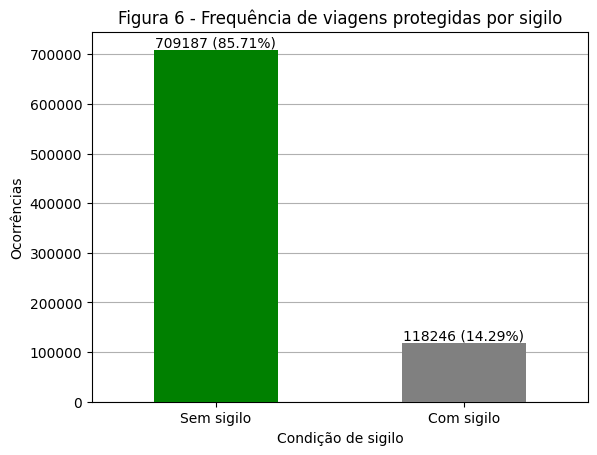

In [188]:
# Plot do gráfico de barras da condição de sigilo
counts = df["Sigilo"].value_counts()
total = counts.sum()
ax = counts.plot(kind='bar', color=['green', 'gray'], zorder=3)

# Título e rótulos
plt.title("Figura 6 - Frequência de viagens protegidas por sigilo")
plt.xlabel("Condição de sigilo")
plt.ylabel("Ocorrências")

# Inserindo o grid no eixo y
plt.grid(True, axis='y', zorder=0)

# Iteração para definição dos rótulos
for i, p in enumerate(ax.patches):
    percentage = counts.iloc[i] / total * 100
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 0.5,
            f'{counts.iloc[i]} ({percentage:.2f}%)', ha='center', va='bottom')

plt.xticks(range(len(counts)), ['Sem sigilo', 'Com sigilo'], rotation=0)
# Exibir o gráfico
plt.show()

# 10 - Análise do atributo "Destinos"

A análise do atributo "Destinos" permite identificar quais são os destinos mais comuns em viagens a serviço na administração federal no ano de 2023.

In [117]:
# Verificando os destinos mais frequentes em viagens a serviço

print("Há valores NA? Resposta: ", df["Destinos"].isna().any(), "\n") # verificando se há valores NA dentro do campo "Nome do órgão superior"

# Listando os destinos com maior número de solicitação de diárias

print("Listando os destinos com maior número de solicitação de diárias: \n")
destinosFrequentes = df[df["Sigilo"] == "Não"]["Destinos"].value_counts() # Excluindo os dados sigilosos da seleção
print(destinosFrequentes.head(20))

Há valores NA? Resposta:  False 

Listando os destinos com maior número de solicitação de diárias: 

Destinos
Brasília/DF               64320
Rio de Janeiro/RJ         26254
São Paulo/SP              24629
São José dos Campos/SP    12289
Salvador/BA                9009
Belo Horizonte/MG          8690
Curitiba/PR                8506
Recife/PE                  8211
Manaus/AM                  7407
Porto Alegre/RS            7162
Belém/PA                   6896
Fortaleza/CE               6710
Foz do Iguaçu/PR           6549
Campo Grande/MS            6214
Florianópolis/SC           5926
Goiânia/GO                 5744
Natal/RN                   5225
João Pessoa/PB             4703
Campinas/SP                4703
Boa Vista/RR               4632
Name: count, dtype: int64


# 11 - Análise do atributo "Valor diárias"

In [118]:
# Conversão do atributo "Valor diárias" de char para numérico
df["Valor diárias"] = df["Valor diárias"].str.replace(',', '.').astype(float)
# Print das primeiras linhas da coluna com tipo alterado para float
print(df["Valor diárias"])


0             0.00
1             0.00
2         39565.70
3          1013.96
4             0.00
            ...   
827428      606.89
827429     1089.00
827430      734.13
827431      319.28
827432        0.00
Name: Valor diárias, Length: 827433, dtype: float64


In [119]:
# Geração de principais métricas da variável de "Valor diárias"

print("Valor máximo: ", df["Valor diárias"].max())
print("Valor mínimo: ", df["Valor diárias"].min())
print("Média: ", df["Valor diárias"].mean())
print("Mediana: ", df["Valor diárias"].median())
print("Variância: ", df["Valor diárias"].var())
print("Desvio padrão: ", df["Valor diárias"].std())
print("Existem NAs? R: ", df["Valor diárias"].isna().any())


Valor máximo:  175337.4
Valor mínimo:  0.0
Média:  1744.248531578992
Mediana:  857.82
Variância:  24264315.604271915
Desvio padrão:  4925.882215834227
Existem NAs? R:  False


In [120]:
# Verificação de quartis e outliers

Q1 = df["Valor diárias"].quantile(0.25)
print("Q1: ", Q1)
Q3 = df["Valor diárias"].quantile(0.75)
print("Q3: ", Q3)
IQR = Q3 - Q1

P95 = df["Valor diárias"].quantile(0.95)
print("P95: ", P95)
P99 = df["Valor diárias"].quantile(0.99)
print("P99: ", P99)

limiteInferior = Q1 - 1.5 * IQR
print("Limite inferior: ", limiteInferior)
limiteSuperior = Q3 + 1.5 * IQR
print("Limite superior: ", limiteSuperior)

outliers = df[(df["Valor diárias"] > limiteSuperior)]
print(len(outliers))

Q1:  265.5
Q3:  1629.59
P95:  5378.669999999897
P99:  15916.85
Limite inferior:  -1780.6349999999998
Limite superior:  3675.7249999999995
80116


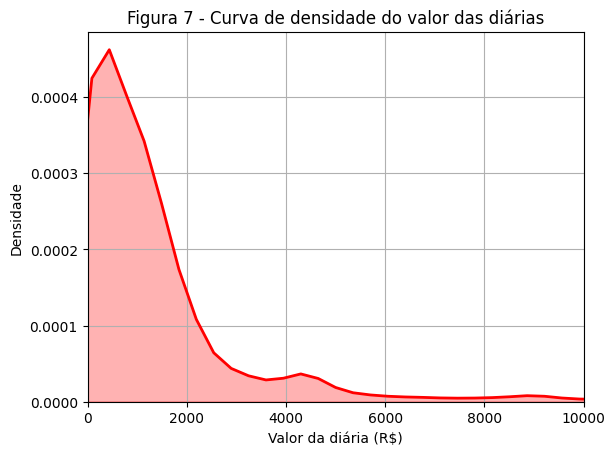

In [171]:
# Plot da curva de densidade

ax = df["Valor diárias"].plot(kind='kde',linewidth=2,color='red')
plt.title("Figura 7 - Curva de densidade do valor das diárias") # Título do gráfico
plt.xlabel("Valor da diária (R$)") # Título do eixo x
plt.ylabel("Densidade") # Título do eixo y
plt.xlim(left=0) # Ocultando valores negativos
plt.xlim(right=10000) # Limite do eixo x
plt.ylim(bottom=0) # Limite do eixo y
# Preenchendo a área abaixo da curva
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
plt.fill_between(x, y, color='red', alpha=0.3)
# Posicionando o grid
plt.grid(True)
plt.show()

In [122]:
# Verificando valor pago de diárias por faixa

bins = [-1, 500, 1000, 10000, 100000, 1000000] # Faixas, utilizei o valor -1 pois a primeira faixa deve incluir também o valor ZERO
labels = ["Menos de 500 reais", "Entre 500 e 1000 reais", "Entre 1000 e 10000 reais", "Entre 10000 e 100000 reais", "Mais de 100000 reais"] # Labels

df["faixaValorDiaria"] = pd.cut(df["Valor diárias"], bins=bins, labels=labels) # Criação da nova coluna com a faixa de valor pago em diárias

print(df["faixaValorDiaria"].value_counts()) # Print da quantidade de diárias por faixa
print(df["faixaValorDiaria"].value_counts(normalize = True)*100) # Print da quantidade de diárias por faixa (percentual)

faixaValorDiaria
Entre 1000 e 10000 reais      350106
Menos de 500 reais            301549
Entre 500 e 1000 reais        157846
Entre 10000 e 100000 reais     17589
Mais de 100000 reais             343
Name: count, dtype: int64
faixaValorDiaria
Entre 1000 e 10000 reais      42.312308
Menos de 500 reais            36.443918
Entre 500 e 1000 reais        19.076590
Entre 10000 e 100000 reais     2.125731
Mais de 100000 reais           0.041454
Name: proportion, dtype: float64


# 12 - Análise do atributo "Valor passagens"

In [123]:
# Conversão do atributo "Valor passagens" de char para numérico
df["Valor passagens"] = df["Valor passagens"].str.replace(',', '.').astype(float)
# Print das primeiras linhas da coluna com tipo alterado para float
print(df["Valor passagens"])

0             0.00
1             0.00
2          7434.13
3             0.00
4         14903.10
            ...   
827428     3331.29
827429     1837.18
827430     4555.95
827431     3745.53
827432     2961.55
Name: Valor passagens, Length: 827433, dtype: float64


In [124]:
# Geração de principais métricas da variável de "Valor passagens"

print("Valor máximo: ", df["Valor passagens"].max())
print("Valor mínimo: ", df["Valor passagens"].min())
print("Média: ", df["Valor passagens"].mean())
print("Mediana: ", df["Valor passagens"].median())
print("Variância: ", df["Valor passagens"].var())
print("Desvio padrão: ", df["Valor passagens"].std())
print("Existem NAs? R: ", df["Valor passagens"].isna().any())

Valor máximo:  186723.29
Valor mínimo:  0.0
Média:  1023.8626121994168
Mediana:  0.0
Variância:  6523803.644884459
Desvio padrão:  2554.1737695161733
Existem NAs? R:  False


In [125]:
# Verificação de quartis e outliers

Q1 = df["Valor passagens"].quantile(0.25)
print("Q1: ", Q1)
Q3 = df["Valor passagens"].quantile(0.75)
print("Q3: ", Q3)
IQR = Q3 - Q1

P95 = df["Valor passagens"].quantile(0.95)
print("P95: ", P95)
P99 = df["Valor passagens"].quantile(0.99)
print("P99: ", P99)

limiteInferior = Q1 - 1.5 * IQR
print("Limite inferior: ", limiteInferior)
limiteSuperior = Q3 + 1.5 * IQR
print("Limite superior: ", limiteSuperior)

outliers = df[(df["Valor passagens"] > limiteSuperior)]
print(len(outliers))

Q1:  0.0
Q3:  1360.51
P95:  4934.31
P99:  9597.334799999977
Limite inferior:  -2040.7649999999999
Limite superior:  3401.2749999999996
90095


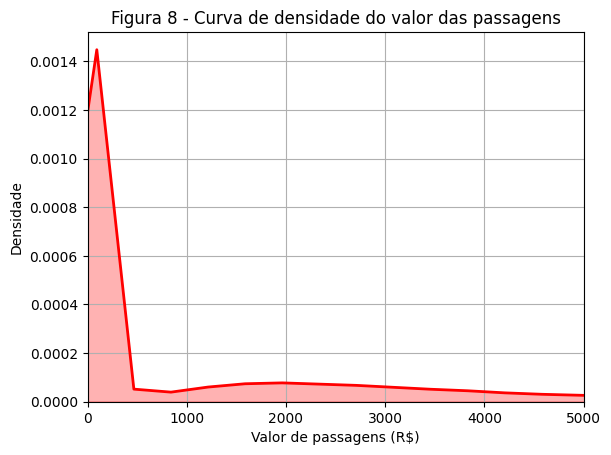

In [175]:
# Plot da curva de densidade

ax = df["Valor passagens"].plot(kind='kde',linewidth=2,color='red')
plt.title("Figura 8 - Curva de densidade do valor das passagens") # Título do gráfico
plt.xlabel("Valor de passagens (R$)") # Título do eixo x
plt.ylabel("Densidade") # Título do eixo y
plt.xlim(left=0) # Ocultando valores negativos
plt.xlim(right=5000) # Limite do eixo x
plt.ylim(bottom=0) # Limite do eixo Y
# Preenchendo a área abaixo da curva
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
plt.fill_between(x, y, color='red', alpha=0.3)
# Posicionando o grid
plt.grid(True)
plt.show()

In [127]:
# Verificando valor pago de passagens por faixa

bins = [-1, 500, 1000, 10000, 100000, 1000000] # Faixas, utilizei o valor -1 pois a primeira faixa deve incluir também o valor ZERO
labels = ["Menos de 500 reais", "Entre 500 e 1000 reais", "Entre 1000 e 10000 reais", "Entre 10000 e 100000 reais", "Mais de 100000 reais"] # Labels

df["faixaValorPassagem"] = pd.cut(df["Valor passagens"], bins=bins, labels=labels) # Criação da nova coluna com a faixa de valor pago em passagens

print(df["faixaValorPassagem"].value_counts()) # Print da quantidade de passagens por faixa
print(df["faixaValorPassagem"].value_counts(normalize = True)*100) # Print da quantidade de valores de passagens por faixa (percentual)

faixaValorPassagem
Menos de 500 reais            589180
Entre 1000 e 10000 reais      216732
Entre 500 e 1000 reais         13805
Entre 10000 e 100000 reais      7699
Mais de 100000 reais              17
Name: count, dtype: int64
faixaValorPassagem
Menos de 500 reais            71.205765
Entre 1000 e 10000 reais      26.193299
Entre 500 e 1000 reais         1.668413
Entre 10000 e 100000 reais     0.930468
Mais de 100000 reais           0.002055
Name: proportion, dtype: float64


# 13 - Análise do atributo "Valor devolução"

In [128]:
# Conversão do atributo "Valor devolução" de char para numérico
df["Valor devolução"] = df["Valor devolução"].str.replace(',', '.').astype(float)
# Print das primeiras linhas da coluna com tipo alterado para float
print(df["Valor devolução"])

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
827428    0.0
827429    0.0
827430    0.0
827431    0.0
827432    0.0
Name: Valor devolução, Length: 827433, dtype: float64


In [129]:
# Geração de principais métricas da variável de "Valor devolução"

print("Valor máximo: ", df["Valor devolução"].max())
print("Valor mínimo: ", df["Valor devolução"].min())
print("Média: ", df["Valor devolução"].mean())
print("Mediana: ", df["Valor devolução"].median())
print("Variância: ", df["Valor devolução"].var())
print("Desvio padrão: ", df["Valor devolução"].std())
print("Existem NAs? R: ", df["Valor devolução"].isna().any())

Valor máximo:  38884.71
Valor mínimo:  0.0
Média:  23.735638208773402
Mediana:  0.0
Variância:  79574.14264796031
Desvio padrão:  282.0888913941141
Existem NAs? R:  False


In [130]:
# Verificação de valores zerados no atributo "Valor devolução"

valoresZerados = df[df["Valor devolução"] == 0]
print(len(valoresZerados))
len(df)
print(len(valoresZerados)/len(df))

801064
0.9681315586881355


In [131]:
# Verificando valor pago de devolução por faixa

bins = [-1, 0, 1000, 10000, 100000, 1000000] # Faixas, utilizei o valor -1 pois a primeira faixa deve incluir também o valor ZERO
labels = ["Nenhum valor a ser devolvido", "Até 1000 reais", "Entre 1000 e 10000 reais", "Entre 10000 e 100000 reais", "Mais de 100000 reais"] # Labels

df["faixaValorDevolucao"] = pd.cut(df["Valor devolução"], bins=bins, labels=labels) # Criação da nova coluna com a faixa de valor pago em devolução

print(df["faixaValorDevolucao"].value_counts()) # Print da quantidade de valores de devolução por faixa
print(df["faixaValorDevolucao"].value_counts(normalize = True)*100) # Print da quantidade de valores de devolução por faixa (percentual)

faixaValorDevolucao
Nenhum valor a ser devolvido    801064
Até 1000 reais                   20855
Entre 1000 e 10000 reais          5404
Entre 10000 e 100000 reais         110
Mais de 100000 reais                 0
Name: count, dtype: int64
faixaValorDevolucao
Nenhum valor a ser devolvido    96.813156
Até 1000 reais                   2.520446
Entre 1000 e 10000 reais         0.653104
Entre 10000 e 100000 reais       0.013294
Mais de 100000 reais             0.000000
Name: proportion, dtype: float64


# 14 - Análise do atributo "Valor outros gastos"

In [132]:
# Conversão do atributo "Valor outros gastos" de char para numérico
df["Valor outros gastos"] = df["Valor outros gastos"].str.replace(',', '.').astype(float)
# Print das primeiras linhas da coluna com tipo alterado para float
print(df["Valor outros gastos"])

0            0.00
1            0.00
2         1095.35
3            0.00
4            0.00
           ...   
827428       0.00
827429       0.00
827430       0.00
827431     400.00
827432       0.00
Name: Valor outros gastos, Length: 827433, dtype: float64


In [133]:
# Geração de principais métricas da variável de "Valor outros gastos"

print("Valor máximo: ", df["Valor outros gastos"].max())
print("Valor mínimo: ", df["Valor outros gastos"].min())
print("Média: ", df["Valor outros gastos"].mean())
print("Mediana: ", df["Valor outros gastos"].median())
print("Variância: ", df["Valor outros gastos"].var())
print("Desvio padrão: ", df["Valor outros gastos"].std())
print("Existem NAs? R: ", df["Valor outros gastos"].isna().any())

Valor máximo:  59668.18
Valor mínimo:  0.0
Média:  16.39529513567866
Mediana:  0.0
Variância:  23170.613245524644
Desvio padrão:  152.21896480243402
Existem NAs? R:  False


In [134]:
# Verificação de valores zerados no atributo "Valor outros gastos"

valoresZerados = df[df["Valor outros gastos"] == 0]
print(len(valoresZerados))
len(df)
print(len(valoresZerados)/len(df))

790437
0.9552882227322333


In [135]:
# Verificando valor pago de outros gastos por faixa

bins = [-1, 0, 1000, 10000, 100000] # Faixas, utilizei o valor -1 pois a primeira faixa deve incluir também o valor ZERO
labels = ["Nenhum valor com outros gastos", "Até 1000 reais", "Entre 1000 e 10000 reais", "Acima de 10000 reais"] # Labels

df["faixaValorOutrosGastos"] = pd.cut(df["Valor outros gastos"], bins=bins, labels=labels) # Criação da nova coluna com a faixa de valor pago em outros gastos

print(df["faixaValorOutrosGastos"].value_counts()) # Print da quantidade de valores de outros gastos por faixa
print(df["faixaValorOutrosGastos"].value_counts(normalize = True)*100) # Print da quantidade de valores de outros gastos por faixa (percentual)

faixaValorOutrosGastos
Nenhum valor com outros gastos    790437
Até 1000 reais                     34828
Entre 1000 e 10000 reais            2164
Acima de 10000 reais                   4
Name: count, dtype: int64
faixaValorOutrosGastos
Nenhum valor com outros gastos    95.528822
Até 1000 reais                     4.209163
Entre 1000 e 10000 reais           0.261532
Acima de 10000 reais               0.000483
Name: proportion, dtype: float64


# 15 - Matriz de correlações

In [136]:
# Criação de matriz de correlações

colunasSelecionadas = ["totalDiasViagem", "Valor diárias", "Valor passagens", "Valor devolução", "Valor outros gastos"]
matrizCorrelacoes = df[colunasSelecionadas].corr()
print(matrizCorrelacoes)

                     totalDiasViagem  Valor diárias  Valor passagens  \
totalDiasViagem             1.000000       0.893478         0.049662   
Valor diárias               0.893478       1.000000         0.153769   
Valor passagens             0.049662       0.153769         1.000000   
Valor devolução             0.098000       0.140654         0.071968   
Valor outros gastos         0.019534       0.099999         0.186786   

                     Valor devolução  Valor outros gastos  
totalDiasViagem             0.098000             0.019534  
Valor diárias               0.140654             0.099999  
Valor passagens             0.071968             0.186786  
Valor devolução             1.000000             0.046338  
Valor outros gastos         0.046338             1.000000  


# 16 - Resumo das Medidas de Tendência Central e Dispersão

In [177]:
df.describe()

,Identificador do processo de viagem,Código do órgão superior,Código órgão solicitante,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,dataInicio,mesInicio,anoInicio,dataFim,anoFim,totalDiasViagem
count,8.274330e+05,827433.000000,827433.000000,827433.000000,827433.000000,827433.000000,827433.000000,827433,827433.000000,827433.0,827433,827433.000000,827433.000000
mean,2.157737e+07,29854.983843,27380.008039,1744.248532,1023.862612,23.735638,16.395295,2023-07-25 02:48:04.505694464,7.292810,2023.0,2023-07-31 00:24:52.361072896,2023.001761,5.900554
min,1.782192e+07,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2023-01-01 00:00:00,1.000000,2023.0,2023-01-01 00:00:00,2023.000000,0.000000
25%,1.887775e+07,22000.000000,22000.000000,265.500000,0.000000,0.000000,0.000000,2023-05-08 00:00:00,5.000000,2023.0,2023-05-12 00:00:00,2023.000000,1.000000
50%,1.912847e+07,30000.000000,26415.000000,857.820000,0.000000,0.000000,0.000000,2023-08-06 00:00:00,8.000000,2023.0,2023-08-11 00:00:00,2023.000000,3.000000
75%,1.939905e+07,47000.000000,37202.000000,1629.590000,1360.510000,0.000000,0.000000,2023-10-18 00:00:00,10.000000,2023.0,2023-10-25 00:00:00,2023.000000,5.000000
max,2.023002e+09,84000.000000,64000.000000,175337.400000,186723.290000,38884.710000,59668.180000,2023-12-31 00:00:00,12.000000,2023.0,2024-11-30 00:00:00,2024.000000,525.000000
std,6.989446e+07,18582.587617,16954.399009,4925.882216,2554.173770,282.088891,152.218965,NaN,3.183425,0.0,NaN,0.041926,18.068466


In [178]:
print(df['Valor diárias'].var())

24264315.604271915


In [179]:
print(df['Valor passagens'].var())

6523803.644884459


In [180]:
print(df['Valor devolução'].var())

79574.14264796031


In [182]:
print(df['Valor outros gastos'].var())

23170.613245524644


In [183]:
print(df['totalDiasViagem'].var())

326.46947673514086
